<a href="https://colab.research.google.com/github/Kenz2000/Projet-DATA2/blob/kenza_vf/estimate_k_bbc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations des librairies

In [23]:
pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 6.26 s (started: 2023-05-18 21:51:59 +00:00)


In [24]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 8.55 s (started: 2023-05-18 21:52:05 +00:00)


In [25]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 10.4 s (started: 2023-05-18 21:52:14 +00:00)


In [26]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 8.6 s (started: 2023-05-18 21:52:24 +00:00)


In [27]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 11.5 s (started: 2023-05-18 21:52:33 +00:00)


In [28]:
pip install tables

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 10.9 s (started: 2023-05-18 21:52:44 +00:00)


In [29]:
pip install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 13.8 s (started: 2023-05-18 21:52:55 +00:00)


In [30]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 8.47 s (started: 2023-05-18 21:53:09 +00:00)


In [31]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 11.1 s (started: 2023-05-18 21:53:17 +00:00)


In [32]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 8.47 s (started: 2023-05-18 21:53:29 +00:00)


# Chargement des utilitaires

In [33]:
! gdown 'https://drive.google.com/uc?id=1zTDcgnFtQWUeXgIce4O2Z2OPn0vJH1aD'

Downloading...
From: https://drive.google.com/uc?id=1zTDcgnFtQWUeXgIce4O2Z2OPn0vJH1aD
To: /content/utils_py.py
100% 6.69k/6.69k [00:00<00:00, 14.8MB/s]
time: 1.93 s (started: 2023-05-18 21:53:37 +00:00)


In [34]:
from gensim.models import KeyedVectors
import pandas as pd
import numpy as np
import warnings
import re

from utils_py import static_document_embeddings, tokenize_re

time: 1.51 ms (started: 2023-05-18 21:53:39 +00:00)


In [35]:

! gdown "https://drive.google.com/uc?id=1--FNn99G1Uut0R1v6mFqiuBi_pG-jC6o"
! gdown "https://drive.google.com/uc?id=1-04KQb6ykGW20yXI8dSZk5YJQKT2CRGh"
! gdown "https://drive.google.com/uc?id=1-Msc4M3lNz-O0sy13iPhtQIYxw9GG3tJ"
! gdown "https://drive.google.com/uc?id=1-jbNYCPMYeOvHMlewE8KYxob8dByECye"
! gdown "https://drive.google.com/uc?id=1PSjnBVZM_hmM0jtQrZ7QNuzTeWDTPuHM"

Downloading...
From: https://drive.google.com/uc?id=1--FNn99G1Uut0R1v6mFqiuBi_pG-jC6o
To: /content/bbc_word2vec.h5
100% 2.70M/2.70M [00:00<00:00, 168MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-04KQb6ykGW20yXI8dSZk5YJQKT2CRGh
To: /content/bbc_glove.h5
100% 2.70M/2.70M [00:00<00:00, 205MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-Msc4M3lNz-O0sy13iPhtQIYxw9GG3tJ
To: /content/bbc_bert.h5
100% 82.2M/82.2M [00:03<00:00, 23.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-jbNYCPMYeOvHMlewE8KYxob8dByECye
To: /content/bbc_roberta.h5
100% 82.2M/82.2M [00:00<00:00, 105MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PSjnBVZM_hmM0jtQrZ7QNuzTeWDTPuHM
To: /content/bbc.csv
100% 5.10M/5.10M [00:00<00:00, 108MB/s]
time: 27.1 s (started: 2023-05-18 21:53:39 +00:00)


In [36]:

bbc_word2vec = pd.read_hdf("bbc_word2vec.h5").to_numpy()
bbc_glove = pd.read_hdf("bbc_glove.h5").to_numpy()
bbc_bert = pd.read_hdf("bbc_bert.h5").to_numpy()
bbc_roberta = pd.read_hdf("bbc_roberta.h5").to_numpy()

time: 642 ms (started: 2023-05-18 21:54:06 +00:00)


In [37]:

bbc_texts = pd.read_csv("bbc.csv")["text"].values
bbc_labels = pd.read_csv("bbc.csv")["label"].values
k_bbc = len(set(bbc_labels))

time: 192 ms (started: 2023-05-18 21:54:07 +00:00)


In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from scipy.special import rel_entr
from sklearn.metrics import silhouette_score, adjusted_rand_score

time: 1.37 ms (started: 2023-05-18 21:54:07 +00:00)


# Comparaison avec Kmeans

Cette méthode permet de déterminer le nombre de clusters en utilisant plusieurs critères tels que la silhouette, Davies-Bouldin (DB), l'inertie, l'ARI (Adjusted Rand Index) et le Calinski-Harabasz (CH) avec la méthode de clustering K-means. En variant le nombre de classes de 2 à 10, les résultats sont visualisés à l'aide d'un graphique qui affiche les scores obtenus pour chaque critère.

In [39]:
def estimate_k(X,true_labels):
  d=dict()
  liste_silhouette =[]
  liste_davies =[]
  liste_ch =[]
  sse=[]
  ari_scores=[]
  
  no_of_clusters = [2, 3, 4, 5, 6,7,8,9,10]
  for n_clusters in no_of_clusters:
        cluster = KMeans(n_clusters = n_clusters,max_iter=100, init='k-means++', n_init=20)
        cluster_labels = cluster.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        liste_silhouette.append(silhouette_avg)
        dbs=davies_bouldin_score(X, cluster_labels)
        liste_davies.append(dbs)
        ch=metrics.calinski_harabasz_score(X, cluster_labels)
        liste_ch.append(ch)
        sse.append(cluster.inertia_)
        ari = adjusted_rand_score(true_labels,cluster_labels)
        ari_scores.append(ari)
  import matplotlib.pyplot as plt

  plt.style.use("fivethirtyeight")
  plt.figure(figsize=(5,4))
  plt.plot(no_of_clusters, liste_silhouette,c="#008fd5",label="Silhouette Coefficient" )
  plt.plot(no_of_clusters, ari_scores, c="#fc4f30", label="ARI")
  plt.plot(no_of_clusters, liste_davies, c="#00ff00", label="Davies_bouldin (DB)")
  plt.xlabel("n_clusters")
  plt.legend()
  plt.title("Nombre de classes(avec Kmeans) :silhouette ,DB,ARI")
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(5, 4))
  plt.plot(no_of_clusters, liste_ch, c="#a020f0", label="Calinski_harabasz(CH)")
  plt.xlabel("n_clusters")
  plt.legend()
  plt.title("Nombre de classes(avec Kmeans) :CH")
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(5, 4))
  plt.plot(no_of_clusters, sse, c="#ffa500", label="SSE")
  plt.xlabel("n_clusters")
  plt.legend()
  plt.title("Nombre de classes(avec Kmeans) :SSE")
  plt.tight_layout()
  plt.show()

time: 4.09 ms (started: 2023-05-18 21:54:07 +00:00)


## La représentation Word2Vec

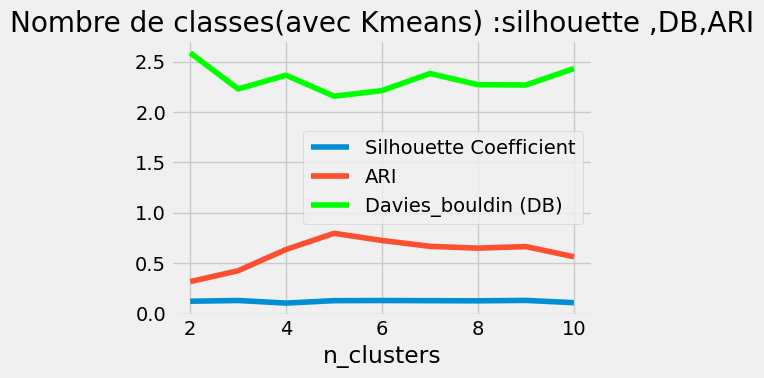

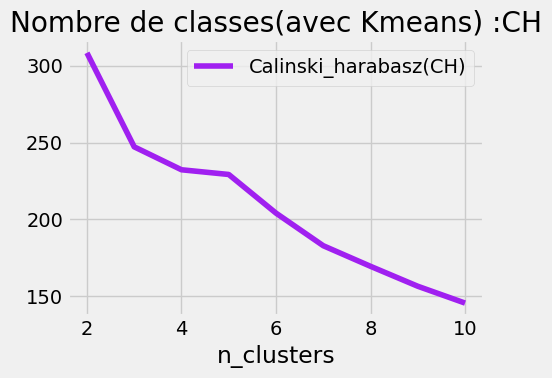

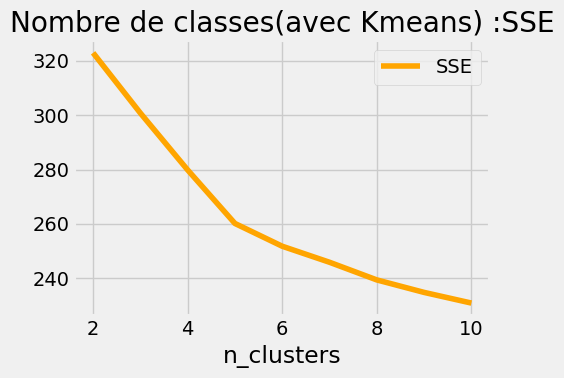

time: 19.3 s (started: 2023-05-18 21:54:07 +00:00)


In [40]:
estimate_k(bbc_word2vec,bbc_labels)

En analysant les résultats du clustering basé sur K-means avec la représentation Word2Vec, nous observons que les différents critères fournissent des estimations variées du nombre de clusters. Le critère ARI, le critère de CH et SSE suggèrent tous un nombre de clusters égal à 5, ce qui correspond à la véritable valeur pour ce dataset. Cependant, le critère DB suggère un nombre de clusters égal à 7, tandis que le critère silhouette ne donne aucune information sur le nombre de clusters. Il est donc clair que certains critères ne permettent pas d'identifier de manière précise le nombre de clusters pour cette représentation Word2Vec.

## La représentation Glove

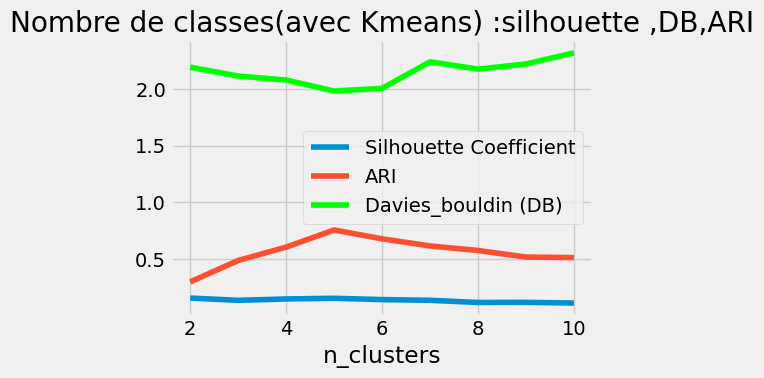

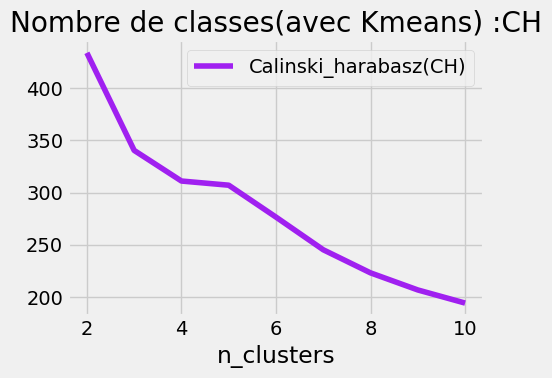

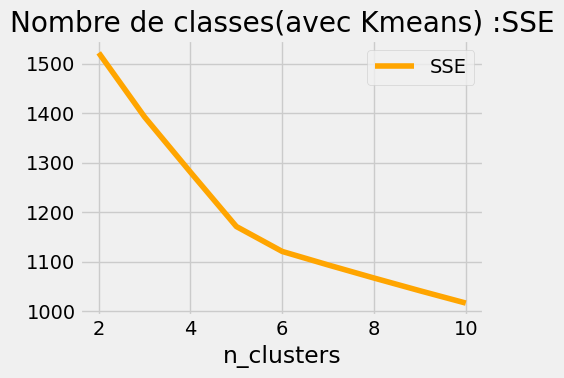

time: 17.2 s (started: 2023-05-18 21:54:26 +00:00)


In [41]:
estimate_k(bbc_glove,bbc_labels)

En analysant les résultats du clustering basé sur K-means avec la représentation Glove, nous observons que les différents critères fournissent des estimations variées du nombre de clusters. Le critère ARI, le critère de CH et SSE suggèrent tous un nombre de clusters égal à 5, ce qui correspond à la véritable valeur pour ce dataset. Cependant, le critère DB suggère un nombre de clusters égal à 7, tandis que le critère silhouette ne donne aucune information sur le nombre de clusters. Il est donc clair que certains critères ne permettent pas d'identifier de manière précise le nombre de clusters pour cette représentation Glove. 

# Comparaison avec CAH (ward)

Cette méthode permet de déterminer le nombre de clusters en utilisant plusieurs critères tels que la silhouette, Davies-Bouldin (DB), l'inertie, l'ARI (Adjusted Rand Index) et le Calinski-Harabasz (CH) avec la méthode de clustering CAH avec le linkage =ward . En variant le nombre de classes de 2 à 10, les résultats sont visualisés à l'aide d'un graphique qui affiche les scores obtenus pour chaque critère.

In [42]:
from sklearn.cluster import AgglomerativeClustering
def estimate_k_cah(X,true_labels):
  d=dict()
  liste_silhouette =[]
  liste_davies =[]
  liste_ch =[]
  sse=[]
  ari_scores=[]
  
  no_of_clusters = [2, 3, 4, 5, 6,7,8,9,10]
  for n_clusters in no_of_clusters:
        cluster =  AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = cluster.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        liste_silhouette.append(silhouette_avg)
        dbs=davies_bouldin_score(X, cluster_labels)
        liste_davies.append(dbs)
        ch=metrics.calinski_harabasz_score(X, cluster_labels)
        liste_ch.append(ch)
        ari = adjusted_rand_score(true_labels,cluster_labels)
        ari_scores.append(ari)
  import matplotlib.pyplot as plt

  plt.style.use("fivethirtyeight")
  plt.figure(figsize=(5,4))
  plt.plot(no_of_clusters, liste_silhouette,c="#008fd5",label="Silhouette Coefficient" )
  plt.plot(no_of_clusters, ari_scores, c="#fc4f30", label="ARI")
  plt.plot(no_of_clusters, liste_davies, c="#00ff00", label="Davies_bouldin (DB)")
  plt.xlabel("n_clusters")
  plt.legend()
  plt.title("Nombre de classes(avec CAH) :silhouette ,DB,ARI")
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(5, 4))
  plt.plot(no_of_clusters, liste_ch, c="#a020f0", label="Calinski_harabasz(CH)")
  plt.xlabel("n_clusters")
  plt.legend()
  plt.title("Nombre de classes(avec CAH) :CH")
  plt.tight_layout()
  plt.show()

time: 1.95 ms (started: 2023-05-18 21:54:44 +00:00)


## La représentation Word2Vec

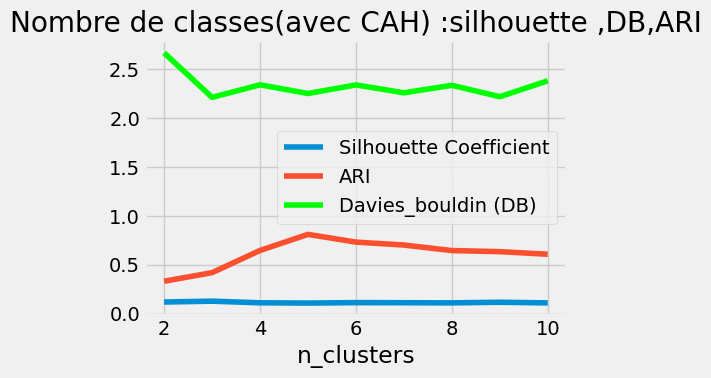

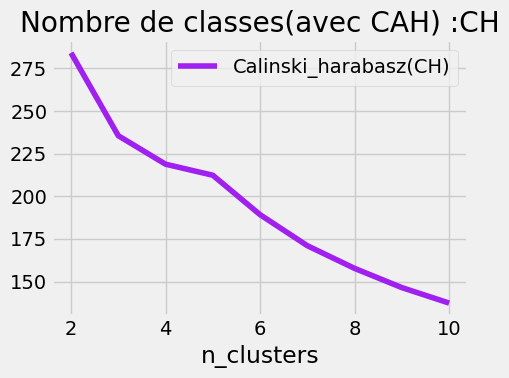

time: 9.88 s (started: 2023-05-18 21:54:44 +00:00)


In [43]:
estimate_k_cah(bbc_word2vec,bbc_labels)

En analysant les résultats du clustering basé sur K-means avec la représentation Word2vec, nous observons que les différents critères fournissent des estimations variées du nombre de clusters. Le critère ARI, le critère de CH  suggèrent tous un nombre de clusters égal à 5, ce qui correspond à la véritable valeur pour ce dataset. Cependant, le critère DB suggère un nombre de clusters égal à 7, tandis que le critère silhouette ne donne aucune information sur le nombre de clusters. Il est donc clair que certains critères ne permettent pas d'identifier de manière précise le nombre de clusters pour cette représentation Word2Vec.

## La représentation Glove

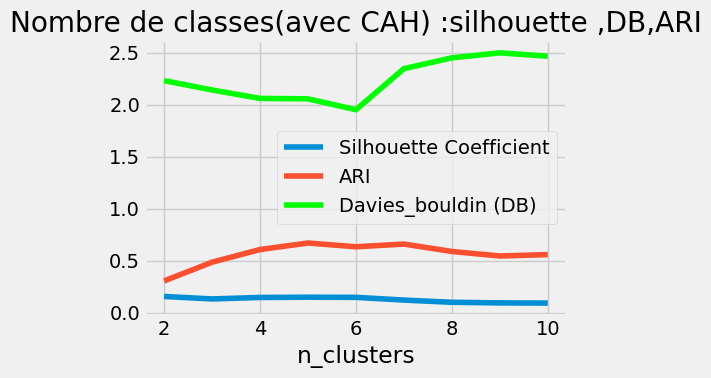

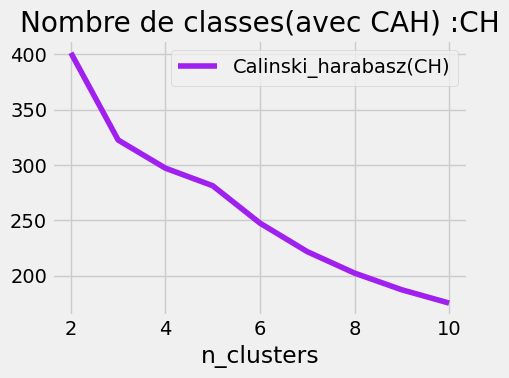

time: 8.5 s (started: 2023-05-18 21:54:53 +00:00)


In [44]:
estimate_k_cah(bbc_glove,bbc_labels)

En analysant les résultats du clustering basé sur CAH (ward) avec la représentation Glove, nous observons que les différents critères fournissent des estimations variées du nombre de clusters. Le critère DB, le critère de CH suggèrent tous un nombre de clusters égal à 5, ce qui correspond à la véritable valeur pour ce dataset. Cependant, le critère silhouette ,ari  ne donnent aucune information sur le nombre de clusters. Il est donc clair que certains critères ne permettent pas d'identifier de manière précise le nombre de clusters pour cette représentation Glove.